In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive (2).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tqdm import tqdm
import glob
import seaborn as sns
import cv2
import io
from PIL import Image

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import ipywidgets as widgets
from tensorflow.keras.utils import to_categorical

# architecture Pare
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels  = ["akiec", "bcc", "bkl", "df", "mel", "nv", "vasc"]

In [ ]:
X  =[]
Y = []

image_size = (224, 224)

for i in labels:
    Datasetspath = "/content/datatree/datatree/train/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))

    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)


/content/datatree/datatree/train/akiec/
260
/content/datatree/datatree/train/bcc/
409
/content/datatree/datatree/train/bkl/
877
/content/datatree/datatree/train/df/
91
/content/datatree/datatree/train/mel/
890
/content/datatree/datatree/train/nv/
5362
/content/datatree/datatree/train/vasc/
111


In [ ]:
for i in labels:
    Datasetspath = "/content/datatree/datatree/train/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])
#     break

/content/datatree/datatree/train/akiec/
/content/datatree/datatree/train/akiec/ISIC_0030844.jpg
/content/datatree/datatree/train/bcc/
/content/datatree/datatree/train/bcc/ISIC_0027920.jpg
/content/datatree/datatree/train/bkl/
/content/datatree/datatree/train/bkl/ISIC_0027706.jpg
/content/datatree/datatree/train/df/
/content/datatree/datatree/train/df/ISIC_0027488.jpg
/content/datatree/datatree/train/mel/
/content/datatree/datatree/train/mel/ISIC_0031666.jpg
/content/datatree/datatree/train/nv/
/content/datatree/datatree/train/nv/ISIC_0029179.jpg
/content/datatree/datatree/train/vasc/
/content/datatree/datatree/train/vasc/ISIC_0029608.jpg


In [ ]:
X.shape, Y.shape

((8000, 224, 224, 3), (8000,))

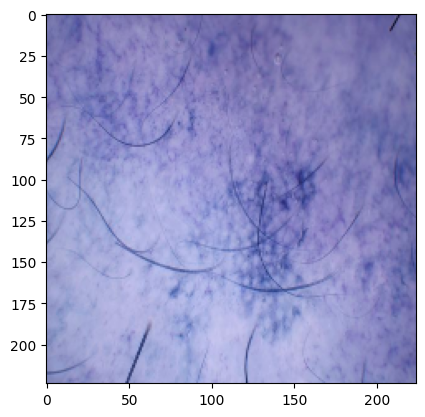

In [ ]:
plt.imshow(X[0])

In [ ]:
print(Y[328])

bcc


In [ ]:

Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]


array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y.shape

(8000, 7)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.3, random_state=101)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.regularizers import l2

# Define LeNet model
model = tf.keras.models.Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(84, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_4 (Batc  (None, 220, 220, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_5 (Batc  (None, 106, 106, 16)     64        
 hNormalization)                                                 
                                                      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [ ]:
Y_train.shape


(3920, 7)

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs = 10, batch_size = 40, verbose = 1)

Epoch 1/10
98/98 [==============================] - 4s 38ms/step - loss: 0.3270 - accuracy: 0.9946 - val_loss: 1.7424 - val_accuracy: 0.6899
Epoch 2/10
98/98 [==============================] - 3s 34ms/step - loss: 0.3081 - accuracy: 0.9987 - val_loss: 1.6919 - val_accuracy: 0.7071
Epoch 3/10
98/98 [==============================] - 3s 35ms/step - loss: 0.3012 - accuracy: 0.9987 - val_loss: 1.6838 - val_accuracy: 0.7107
Epoch 4/10
98/98 [==============================] - 3s 35ms/step - loss: 0.2950 - accuracy: 0.9992 - val_loss: 1.6965 - val_accuracy: 0.7155
Epoch 5/10
98/98 [==============================] - 3s 33ms/step - loss: 0.2892 - accuracy: 0.9995 - val_loss: 1.6830 - val_accuracy: 0.7095
Epoch 6/10
98/98 [==============================] - 3s 34ms/step - loss: 0.2843 - accuracy: 0.9995 - val_loss: 1.7148 - val_accuracy: 0.7125
Epoch 7/10
98/98 [==============================] - 3s 32ms/step - loss: 0.2788 - accuracy: 0.9995 - val_loss: 1.7256 - val_accuracy: 0.7119
Epoch 8/10
98

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_train, Y_train)

# Print the test accuracy
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))


123/123 [==============================] - 1s 10ms/step - loss: 0.2592 - accuracy: 0.9995
Test Accuracy: 99.95%


Model Accuracy



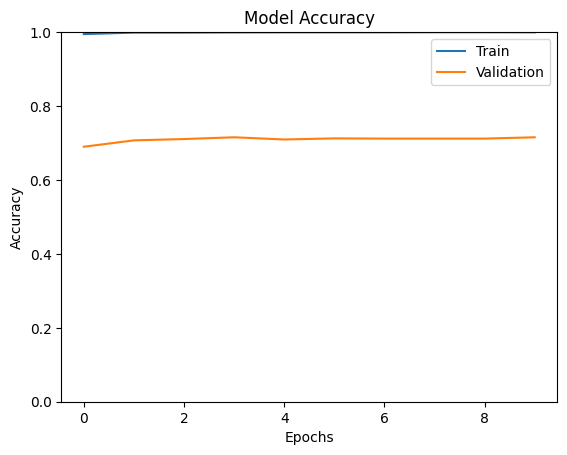

In [ ]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



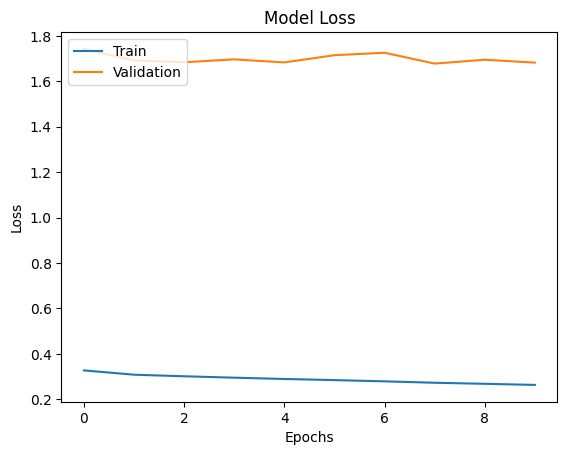

In [ ]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

75/75 [==============================] - 1s 8ms/step


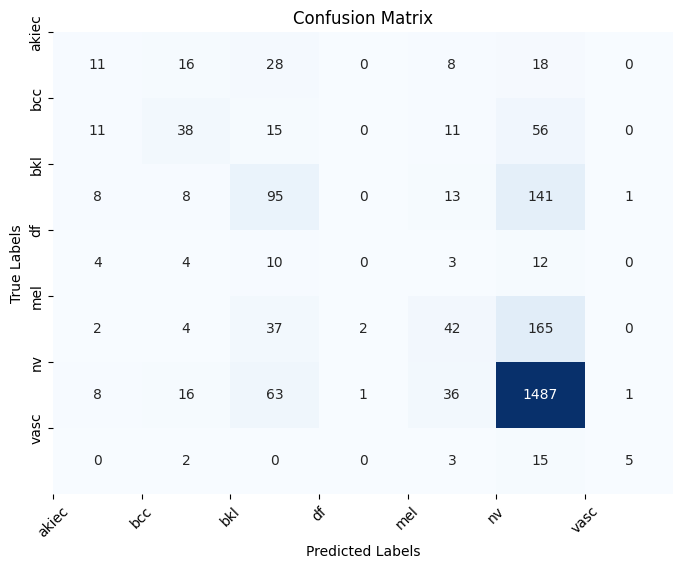

In [ ]:
# Assuming you have predictions and true labels for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Create a function to plot the confusion matrix
def plot_confusion_matrix(confusion_mtx, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, labels)

In [ ]:
from tensorflow.keras.preprocessing import image
def pred(path):
  img_path = path
  img = image.load_img(img_path, target_size=((224,224)))
  img_array = image.img_to_array(img)
  img_tensor = np.expand_dims(img_array, axis=0)
  img_tensor = img_tensor / 255.0
  prediction = model.predict(img_tensor)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = labels[predicted_class_index]
  imge=cv2.imread(path)
  cv2_imshow(imge)
  print('Predicted class:', predicted_class_name)

1/1 [==============================] - 0s 382ms/step


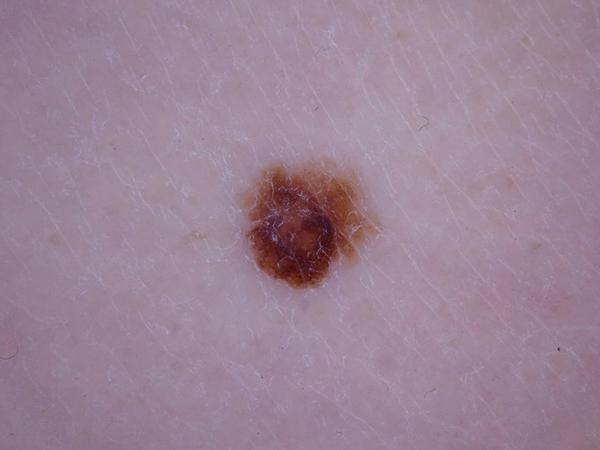

Predicted class: mel


In [ ]:

from google.colab.patches import cv2_imshow
pred('/content/datatree/train/mel/ISIC_0026996.jpg')

